In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rc('font',family = 'NanumBarunGothic')
plt.rc('xtick', labelsize = 20) # x축 라벨 크기
plt.rc('ytick', labelsize = 20) # y축 라벨 크기

# **1. 데이터 불러오기**

In [3]:
df = pd.read_csv("./datasets/preprocessing/final.csv",encoding ="euc-kr")
df = df.loc[df['행정구'] == '강동구'].reset_index(drop = True)
df.head(10)

,행정구,행정동,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,...,폐업점포영업개월,10대 미만,10대,20 ~ 30대,40 ~ 50대,60대,70대 이상,총인구,역(전체),역(환승역)
0,강동구,강일동,3,2,0,1,0,11,0,0,...,45.0,2989,3571,8025,10231,4807,3474,33097,1,0
1,강동구,상일1동,11,2,0,0,2,11,0,0,...,59.0,4847,4315,9226,13121,4984,2545,39038,1,0
2,강동구,상일2동,1,0,0,0,0,0,0,0,...,59.0,1080,1414,3329,3565,1349,1234,11971,0,0
3,강동구,명일1동,14,5,0,3,5,18,1,1,...,51.0,2144,2410,6787,8154,3741,2461,25697,2,0
4,강동구,명일2동,6,0,0,0,1,7,0,0,...,57.0,1026,2430,4110,5711,2550,1535,17362,0,0
5,강동구,고덕1동,6,0,0,0,1,12,0,0,...,54.0,2386,3646,4734,8585,2771,1728,23850,1,0
6,강동구,고덕2동,4,2,0,1,1,13,0,0,...,59.0,2522,2135,5856,7452,2985,1746,22696,0,0
7,강동구,암사1동,8,1,0,0,1,31,0,0,...,51.0,1872,2481,9521,11226,5200,4005,34305,0,0
8,강동구,암사2동,5,4,0,1,0,5,0,0,...,52.0,1264,1038,4572,4623,2022,1605,15124,1,0
9,강동구,암사3동,1,0,0,1,0,6,0,0,...,57.0,1662,1919,3997,5860,2375,1653,17466,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 72 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   행정구             19 non-null     object 
 1   행정동             19 non-null     object 
 2   갈비/삼겹살          19 non-null     int64  
 3   곱창/양구이전문        19 non-null     int64  
 4   기사식당            19 non-null     int64  
 5   기타고기요리          19 non-null     int64  
 6   냉면집             19 non-null     int64  
 7   닭/오리요리          19 non-null     int64  
 8   돌솥/비빕밥전문점       19 non-null     int64  
 9   두부요리전문          19 non-null     int64  
 10  버섯전문점           19 non-null     int64  
 11  별식/퓨전요리         19 non-null     int64  
 12  보리밥전문           19 non-null     int64  
 13  부대찌개/섞어찌개       19 non-null     int64  
 14  부페              19 non-null     int64  
 15  분식              19 non-null     int64  
 16  설렁탕집            19 non-null     int64  
 17  순두부전문           19 non-null     int64

- 총 72개의 컬럼
- 강남구의 경우 19개의 행정동 -> 각 컬럼마다 **19개**의 데이터가 존재해야 한다.
- 결측치 존재 x

# **2. 업종 수와 각 변수들 간의 상관관계 파악하기**

- 상관계수는 **-1부터 1** 사이로 구성된다.
- 0.3부터 0.7 사이면 뚜렷한 양적 선형관계, 0.7 이상이면 강한 양적 상관관계라 할 수 있음
- 상관계수의 절댓값이 **0.3 이상**인 업종들 위주로 파악

**✔ df.corr() 적용 시 NaN**
- 피어쓴 상관계수 계산 식은 아래와 같음
- 따라서, 모든 행의 데이터 값이 동일한 경우 표준편차가 0이 되어 분모가 0으로 계산된다. 
    - 이로 인해, 원본 데이터에 결측치가 없어도 NaN이 발생될 수 있다.

![corr](pearson.jpg)

In [5]:
empty = pd.DataFrame(columns = {'업종','변수','상관계수'}) 
empty # 가나다 순으로 컬럼명이 붙는다.

,변수,상관계수,업종


In [6]:
empty.columns = ['업종','변수','상관계수']
empty

,업종,변수,상관계수


In [7]:
### 33개의 업종에 대해 각 업종과의 상관계수가 0.3 이상인 변수만 추출하는 함수

def selection(df):
    result_df = pd.DataFrame(columns = {'업종','변수','상관계수'}) # 빈 DataFrame
    result_df.columns = ['업종','변수','상관계수'] # 컬럼 순서 변경
    
    sectors = df.columns # 전체 33개의 업종
    
    for i in range(len(sectors)):
        sector = sectors[i] # 각 업종
        variables = list(df.loc[df[sector] >= 0.3, sector].index) + list(df.loc[df[sector] <= -0.3, sector].index) # 상관계수의 절댓값이 0.3 이상인 변수들
        corrs = list(df.loc[df[sector] >= 0.3, sector].values) + list(df.loc[df[sector] <= -0.3, sector].values) # 각각의 상관계수
        
        for j in range(len(variables)):
            result_df.loc[len(result_df)] = [sector,variables[j],corrs[j]] # 행 추가
    
    return result_df

## **2-1. 강동구**
- 각각의 데이터셋 별로 변수들의 영향력 확인

### **a) 생활인구**

In [8]:
### 필요한 데이터 추출

df_life = df.iloc[:,:49]
df_life.head()

,행정구,행정동,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,...,40~50대 생활인구_평일,60대 생활인구_평일,70대 이상 생활인구_평일,총생활인구수_주말,10대 미만 생활인구_주말,10대 생활인구_주말,20~30대 생활인구_주말,40~50대 생활인구_주말,60대 생활인구_주말,70대 이상 생활인구_주말
0,강동구,강일동,3,2,0,1,0,11,0,0,...,383426.2063,127204.67340,127807.43400,1.215816e+06,127204.86690,146774.57370,295264.49530,385684.6673,128183.43210,132704.09020
1,강동구,상일1동,11,2,0,0,2,11,0,0,...,153339.8163,55515.66958,49869.14696,4.606455e+05,27018.89269,59193.26052,112048.26940,159795.2840,53992.41056,48597.39404
2,강동구,상일2동,1,0,0,0,0,0,0,0,...,153339.8163,55515.66958,49869.14696,4.606455e+05,27018.89269,59193.26052,112048.26940,159795.2840,53992.41056,48597.39404
3,강동구,명일1동,14,5,0,3,5,18,1,1,...,188247.7958,80692.91055,78458.59438,6.466697e+05,44971.14383,73678.98816,158608.35770,206117.7181,83788.22469,79505.31138
4,강동구,명일2동,6,0,0,0,1,7,0,0,...,112471.3473,45138.56219,42410.73945,3.806145e+05,26407.61095,73912.19505,77002.55924,118747.2134,44571.59330,39973.33371


In [9]:
### 상관계수 파악

life_corr = df_life.corr().iloc[33:,:33]
life_corr

,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,별식/퓨전요리,...,족발/보쌈전문,중식,추어탕전문,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문
총생활인구수_평일,0.630665,0.590089,-0.040096,0.452588,0.525261,0.655968,0.244093,-0.021356,-0.031896,0.539972,...,0.523882,0.574335,0.174452,0.491081,0.672489,0.551301,0.657877,-0.233992,0.569862,0.009148
10대 미만 생활인구_평일,0.181201,0.155008,-0.134365,0.161984,0.166213,0.285026,0.058850,-0.130851,-0.029765,0.108722,...,0.157661,0.059727,-0.008288,0.036536,0.312602,0.129450,0.154285,-0.156943,0.074088,-0.067585
10대 생활인구_평일,0.140306,0.028868,-0.253025,0.069710,0.160626,0.159560,0.099434,-0.044933,-0.098111,0.040337,...,0.074499,-0.025074,0.004803,-0.014236,0.185904,0.119294,0.039694,-0.010835,0.001197,-0.131117
20~30대 생활인구_평일,0.708953,0.712598,0.050816,0.520280,0.572028,0.720938,0.268972,-0.005045,-0.001863,0.626617,...,0.604822,0.694841,0.221275,0.599587,0.707552,0.640808,0.779141,-0.291809,0.698076,0.064802
40~50대 생활인구_평일,0.650380,0.599953,-0.035838,0.464335,0.522344,0.670195,0.244858,0.000351,-0.017271,0.543613,...,0.533022,0.585144,0.187335,0.511070,0.673390,0.546609,0.675754,-0.229465,0.584760,0.040853
60대 생활인구_평일,0.719180,0.681470,-0.021496,0.497091,0.623264,0.720274,0.300854,-0.014339,-0.073733,0.638005,...,0.597881,0.696519,0.182301,0.580735,0.760797,0.628173,0.751088,-0.212924,0.675405,0.014577
70대 이상 생활인구_평일,0.684359,0.630509,-0.013127,0.487185,0.589658,0.703351,0.246374,0.000936,-0.027312,0.650696,...,0.575816,0.690205,0.203327,0.572087,0.771290,0.630142,0.739103,-0.228706,0.637994,-0.036688
총생활인구수_주말,0.650067,0.623391,-0.019038,0.446869,0.550245,0.694235,0.275032,-0.033769,-0.079783,0.542797,...,0.570668,0.599397,0.156501,0.506625,0.669681,0.566978,0.679688,-0.225133,0.606121,0.024646
10대 미만 생활인구_주말,0.238399,0.212646,-0.071859,0.172490,0.213325,0.360574,0.075343,-0.136829,-0.059758,0.127396,...,0.226739,0.118781,-0.015487,0.095543,0.346139,0.179797,0.225915,-0.172481,0.135190,-0.058924
10대 생활인구_주말,0.264101,0.160936,-0.201052,0.144952,0.248485,0.316760,0.137398,-0.044209,-0.107493,0.143143,...,0.219965,0.116118,0.049035,0.111854,0.293282,0.237148,0.194430,-0.074067,0.143293,-0.115297


In [10]:
### 각 업종별로 상관계수가 높은 변수 확인하기
# 업종은 오름차순, 상관계수는 내림차순

result_life = selection(life_corr)
result_life.sort_values(by = ['업종','상관계수'],ascending = [True, False]).reset_index(drop = True)

,업종,변수,상관계수
0,갈비/삼겹살,20~30대 생활인구_주말,0.727196
1,갈비/삼겹살,60대 생활인구_주말,0.722154
2,갈비/삼겹살,60대 생활인구_평일,0.719180
3,갈비/삼겹살,20~30대 생활인구_평일,0.708953
4,갈비/삼겹살,70대 이상 생활인구_평일,0.684359
...,...,...,...
200,해장국/감자탕,70대 이상 생활인구_평일,0.637994
201,해장국/감자탕,총생활인구수_주말,0.606121
202,해장국/감자탕,40~50대 생활인구_주말,0.598899
203,해장국/감자탕,40~50대 생활인구_평일,0.584760


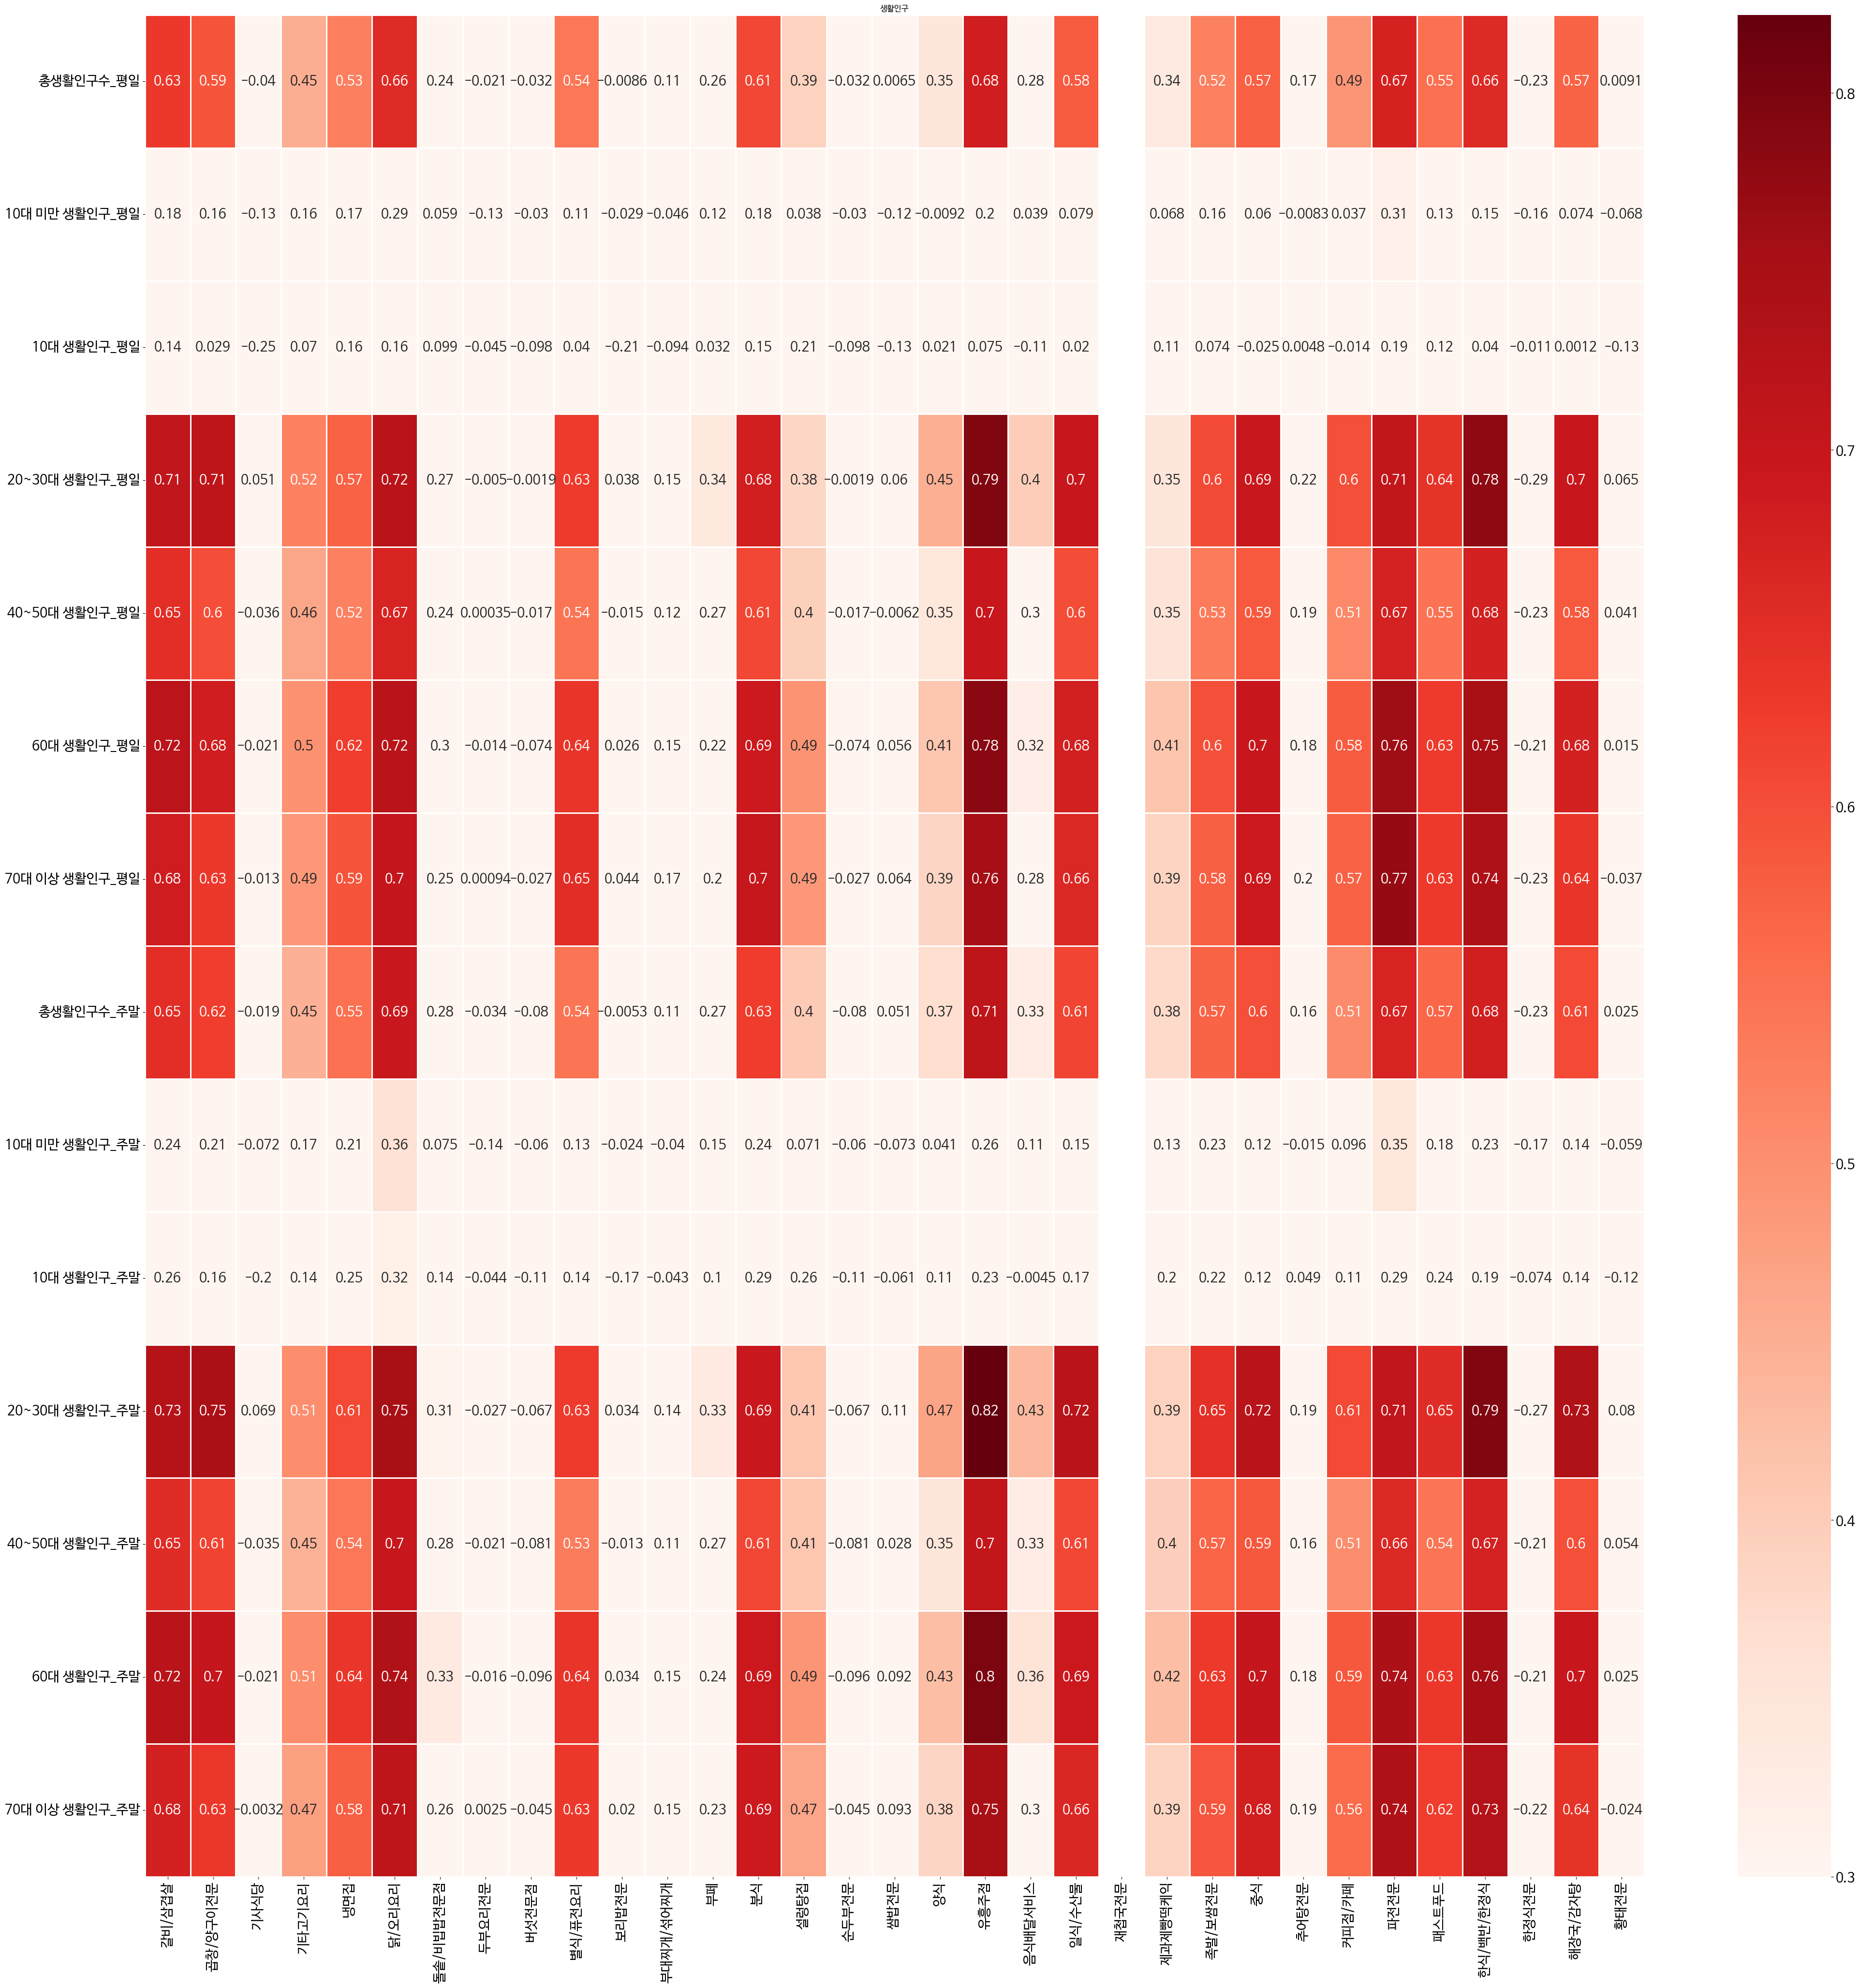

In [11]:
### 시각화
# annot: 각 cell의 값 표시 여부
# linewidths: cell 사이의 선 간격

# 상관계수의 절댓값이 0.3 이상인 변수들만 색으로 표시
plt.figure(figsize = (50,50))
sns.heatmap(life_corr,annot = True, vmin = 0.3, linewidths = 1, annot_kws={"size": 20}, cmap = 'Reds')
plt.title("생활인구")
plt.show()

In [12]:
result_life.groupby('업종')['변수'].count()

업종
갈비/삼겹살       10
곱창/양구이전문     10
기타고기요리       10
냉면집          10
닭/오리요리       12
돌솥/비빕밥전문점     3
별식/퓨전요리      10
부페            2
분식           10
설렁탕집         10
양식           10
유흥주점         10
음식배달서비스       6
일식/수산물       10
제과제빵떡케익      10
족발/보쌈전문      10
중식           10
커피점/카페       10
파전전문         12
패스트푸드        10
한식/백반/한정식    10
해장국/감자탕      10
Name: 변수, dtype: int64

- 생활인구 데이터의 전체 변수 개수: **14개**
- 생활인구 데이터의 경우 대부분의 변수들이 각 업종들과의 상관계수가 0.3 이상임을 확인할 수 있다.
- 생활인구 데이터의 대부분의 변수들은 각 업종의 업소 수와 뚜렷한 상관관계가 있다고 할 수 있다.

### **b) 대학정보**

In [13]:
### 필요한 데이터 추출

df_univ = pd.concat([df.iloc[:,0:35],df.iloc[:,49:52]],axis = 1)
df_univ.head()

,행정구,행정동,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,...,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문,대학교(전체),일반대학,온라인대학
0,강동구,강일동,3,2,0,1,0,11,0,0,...,11,0,9,21,0,0,0,0,0,0
1,강동구,상일1동,11,2,0,0,2,11,0,0,...,39,0,12,46,1,1,0,0,0,0
2,강동구,상일2동,1,0,0,0,0,0,0,0,...,11,0,4,7,0,0,0,0,0,0
3,강동구,명일1동,14,5,0,3,5,18,1,1,...,59,0,18,46,1,5,0,0,0,0
4,강동구,명일2동,6,0,0,0,1,7,0,0,...,34,0,18,26,0,2,0,0,0,0


In [14]:
### 상관계수 파악

univ_corr = df_univ.corr().iloc[33:,:33]
univ_corr

,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,별식/퓨전요리,...,족발/보쌈전문,중식,추어탕전문,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문
대학교(전체),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
일반대학,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
온라인대학,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- 강동구의 경우 대학교가 존재하지 않는다.
    - **강동구**에서 대학정보 데이터는 업종 분포에 영향을 미치지 않는다.

### **c) 초중고학교정보**

In [15]:
### 필요한 데이터 추출

df_school = pd.concat([df.iloc[:,0:35],df.iloc[:,52:56]],axis = 1)
df_school.head()

,행정구,행정동,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,...,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문,초중고(전체),초등학교,중학교,고등학교
0,강동구,강일동,3,2,0,1,0,11,0,0,...,0,9,21,0,0,0,7,3,3,1
1,강동구,상일1동,11,2,0,0,2,11,0,0,...,0,12,46,1,1,0,10,3,2,5
2,강동구,상일2동,1,0,0,0,0,0,0,0,...,0,4,7,0,0,0,1,1,0,0
3,강동구,명일1동,14,5,0,3,5,18,1,1,...,0,18,46,1,5,0,1,1,0,0
4,강동구,명일2동,6,0,0,0,1,7,0,0,...,0,18,26,0,2,0,3,2,0,1


In [16]:
### 상관계수 파악

school_corr = df_school.corr().iloc[33:,:33]
school_corr

,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,별식/퓨전요리,...,족발/보쌈전문,중식,추어탕전문,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문
초중고(전체),-0.129007,-0.172683,-0.298010,-1.628958e-01,-0.064697,-0.201393,-0.227676,-0.316321,-1.490050e-02,0.137513,...,-0.316321,-0.155586,-0.157320,-0.266541,0.040282,-0.146947,-0.183380,0.261573,-0.299578,-1.360223e-01
초등학교,0.128552,-0.025289,-0.321429,-1.877101e-02,0.105330,0.012472,-0.138592,-0.174964,1.309524e-01,0.321599,...,-0.135388,0.097334,0.118297,0.009171,0.314347,0.068170,0.040670,-0.036451,-0.065277,-3.325458e-01
중학교,-0.214489,-0.109124,-0.256851,-4.496326e-17,-0.126252,-0.195696,-0.186886,-0.314576,-3.208066e-17,0.069041,...,-0.269637,-0.215062,-0.212692,-0.337835,0.048444,-0.163421,-0.182807,0.157288,-0.296500,-7.028521e-17
고등학교,-0.223057,-0.262164,-0.149376,-3.331087e-01,-0.133737,-0.289353,-0.217375,-0.274422,-1.493764e-01,-0.047322,...,-0.345361,-0.251723,-0.276106,-0.314158,-0.233439,-0.247784,-0.286102,0.470438,-0.351029,5.844057e-03


In [17]:
### 각 업종별로 상관계수가 높은 변수 확인하기
# 업종은 오름차순, 상관계수는 내림차순

result_school = selection(school_corr)
result_school.sort_values(by = ['업종','상관계수'],ascending = [True, False]).reset_index(drop = True)

,업종,변수,상관계수
0,기사식당,초등학교,-0.321429
1,기타고기요리,고등학교,-0.333109
2,두부요리전문,중학교,-0.314576
3,두부요리전문,초중고(전체),-0.316321
4,별식/퓨전요리,초등학교,0.321599
5,부페,초등학교,-0.321429
6,설렁탕집,초중고(전체),-0.324940
7,설렁탕집,고등학교,-0.351458
8,설렁탕집,중학교,-0.411278
9,쌈밥전문,초등학교,-0.313476


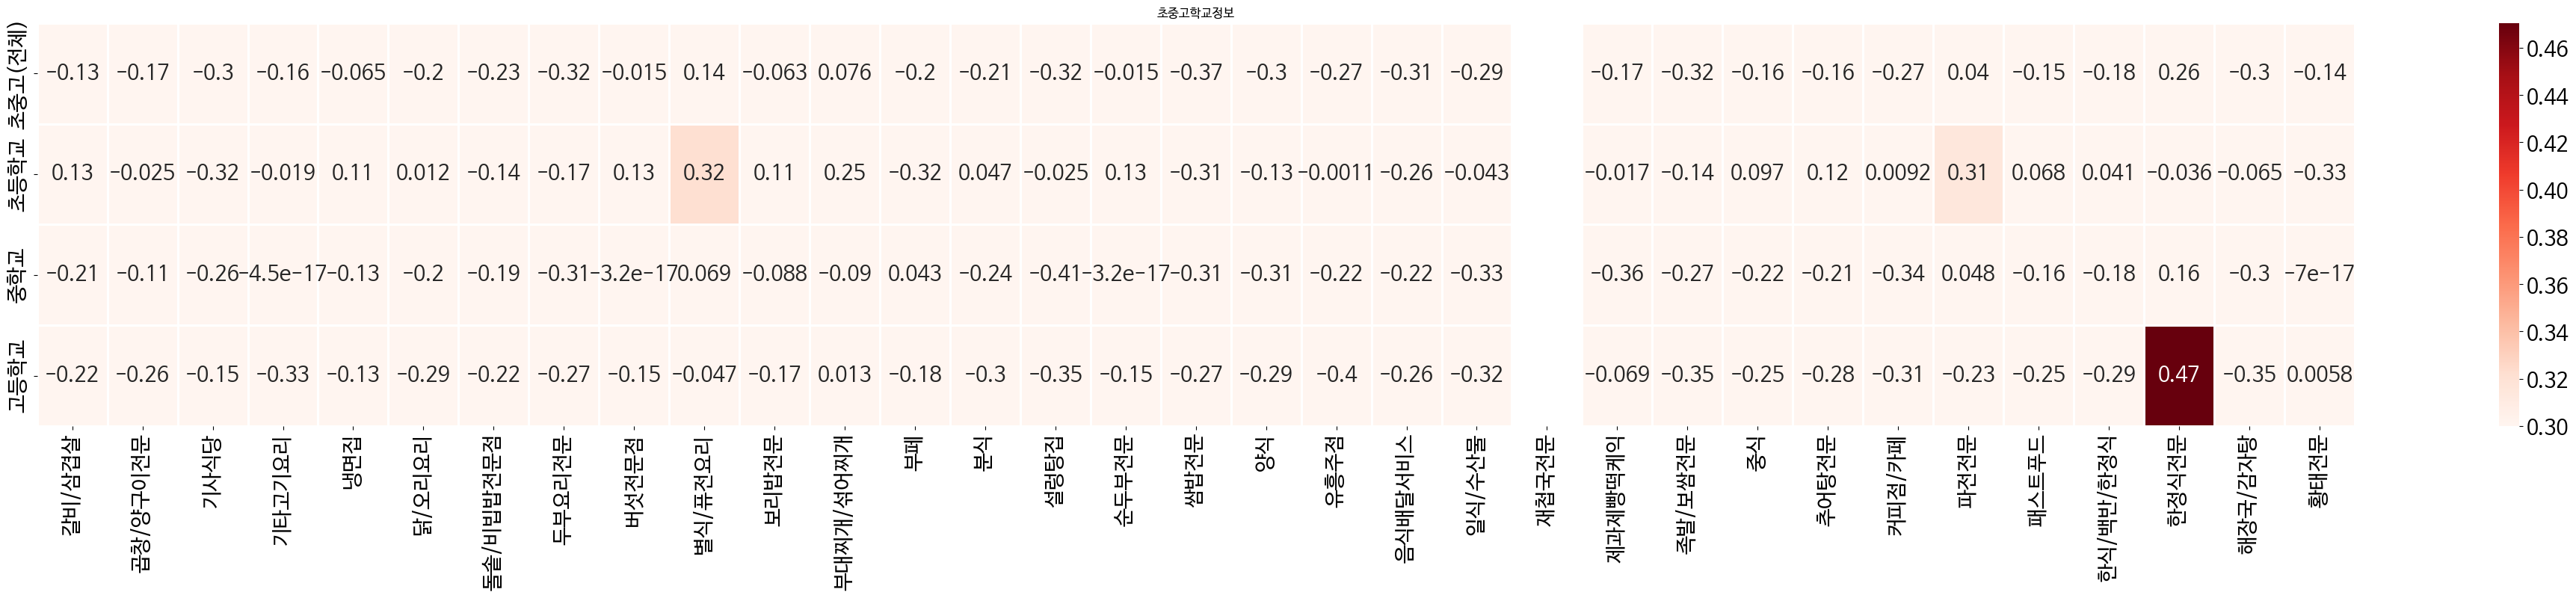

In [18]:
### 시각화
# annot: 각 cell의 값 표시 여부
# linewidths: cell 사이의 선 간격

# 상관계수의 절댓값이 0.3 이상인 변수들만 색으로 표시
plt.figure(figsize = (50,7))
sns.heatmap(school_corr,annot = True, vmin = 0.3, linewidths = 1, annot_kws={"size": 20}, cmap = 'Reds')
plt.title("초중고학교정보")
plt.show()

In [19]:
result_school.groupby('업종')['변수'].count()

업종
기사식당       1
기타고기요리     1
두부요리전문     2
별식/퓨전요리    1
부페         1
설렁탕집       3
쌈밥전문       3
양식         2
유흥주점       1
음식배달서비스    1
일식/수산물     2
제과제빵떡케익    1
족발/보쌈전문    2
커피점/카페     2
파전전문       1
한정식전문      1
해장국/감자탕    1
황태전문       1
Name: 변수, dtype: int64

- 초중고학교정보 데이터의 전체 변수 개수: **4개**
- 초중고학교정보 데이터의 경우 상당수의 변수들이 각 업종들과의 상관계수가 0.3 이상임을 확인할 수 있다.
- 서울시 전체와 비교하였을 때 **강동구**에서는 초중고학교정보 데이터는 각 업종의 업소 수와 상당히 뚜렷한 상관관계가 있다고 할 수 있다.

### **d) 소득정보**

In [20]:
### 필요한 데이터 추출

df_income = pd.concat([df.iloc[:,0:35],df.iloc[:,56:60]],axis = 1)
df_income.head()

,행정구,행정동,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,...,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문,총인구수,총가구수,가구당인구수,평균소득금액
0,강동구,강일동,3,2,0,1,0,11,0,0,...,0,9,21,0,0,0,32044,11319,2.83,5334.875
1,강동구,상일1동,11,2,0,0,2,11,0,0,...,0,12,46,1,1,0,31951,11053,2.89,6160.860
2,강동구,상일2동,1,0,0,0,0,0,0,0,...,0,4,7,0,0,0,31951,11053,2.89,6160.860
3,강동구,명일1동,14,5,0,3,5,18,1,1,...,0,18,46,1,5,0,25205,9358,2.69,6783.310
4,강동구,명일2동,6,0,0,0,1,7,0,0,...,0,18,26,0,2,0,16574,5563,2.98,6783.310


In [21]:
### 상관계수 파악

income_corr = df_income.corr().iloc[33:,:33]
income_corr

,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,별식/퓨전요리,...,족발/보쌈전문,중식,추어탕전문,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문
총인구수,0.563163,0.455068,-0.026595,0.225112,0.519630,0.647975,0.184582,-0.123310,-1.439836e-01,0.514805,...,0.539249,0.605614,0.094091,0.482402,0.546490,0.495337,0.606810,-0.009453,0.512018,-0.050112
총가구수,0.678035,0.612846,0.106964,0.309562,0.600069,0.776800,0.223520,-0.119371,-1.380631e-01,0.632267,...,0.673964,0.762997,0.156264,0.611094,0.651083,0.643687,0.771558,-0.131206,0.680634,-0.004858
가구당인구수,-0.509928,-0.628573,-0.416939,-0.343051,-0.357716,-0.603388,-0.154442,-0.046422,-3.747872e-17,-0.559345,...,-0.545792,-0.674313,-0.178906,-0.547900,-0.434655,-0.610137,-0.697759,0.399230,-0.640457,-0.066434
평균소득금액,-0.024464,-0.316527,-0.036114,-0.248730,0.056617,-0.044476,-0.026339,0.124413,-3.611416e-02,-0.278630,...,-0.139712,-0.102201,-0.097169,-0.036149,-0.082936,-0.113006,-0.164002,0.169669,-0.103208,0.057939


In [22]:
### 각 업종별로 상관계수가 높은 변수 확인하기
# 업종은 오름차순, 상관계수는 내림차순

result_income = selection(income_corr)
result_income.sort_values(by = ['업종','상관계수'],ascending = [True, False]).reset_index(drop = True)

,업종,변수,상관계수
0,갈비/삼겹살,총가구수,0.678035
1,갈비/삼겹살,총인구수,0.563163
2,갈비/삼겹살,가구당인구수,-0.509928
3,곱창/양구이전문,총가구수,0.612846
4,곱창/양구이전문,총인구수,0.455068
...,...,...,...
57,한식/백반/한정식,가구당인구수,-0.697759
58,한정식전문,가구당인구수,0.399230
59,해장국/감자탕,총가구수,0.680634
60,해장국/감자탕,총인구수,0.512018


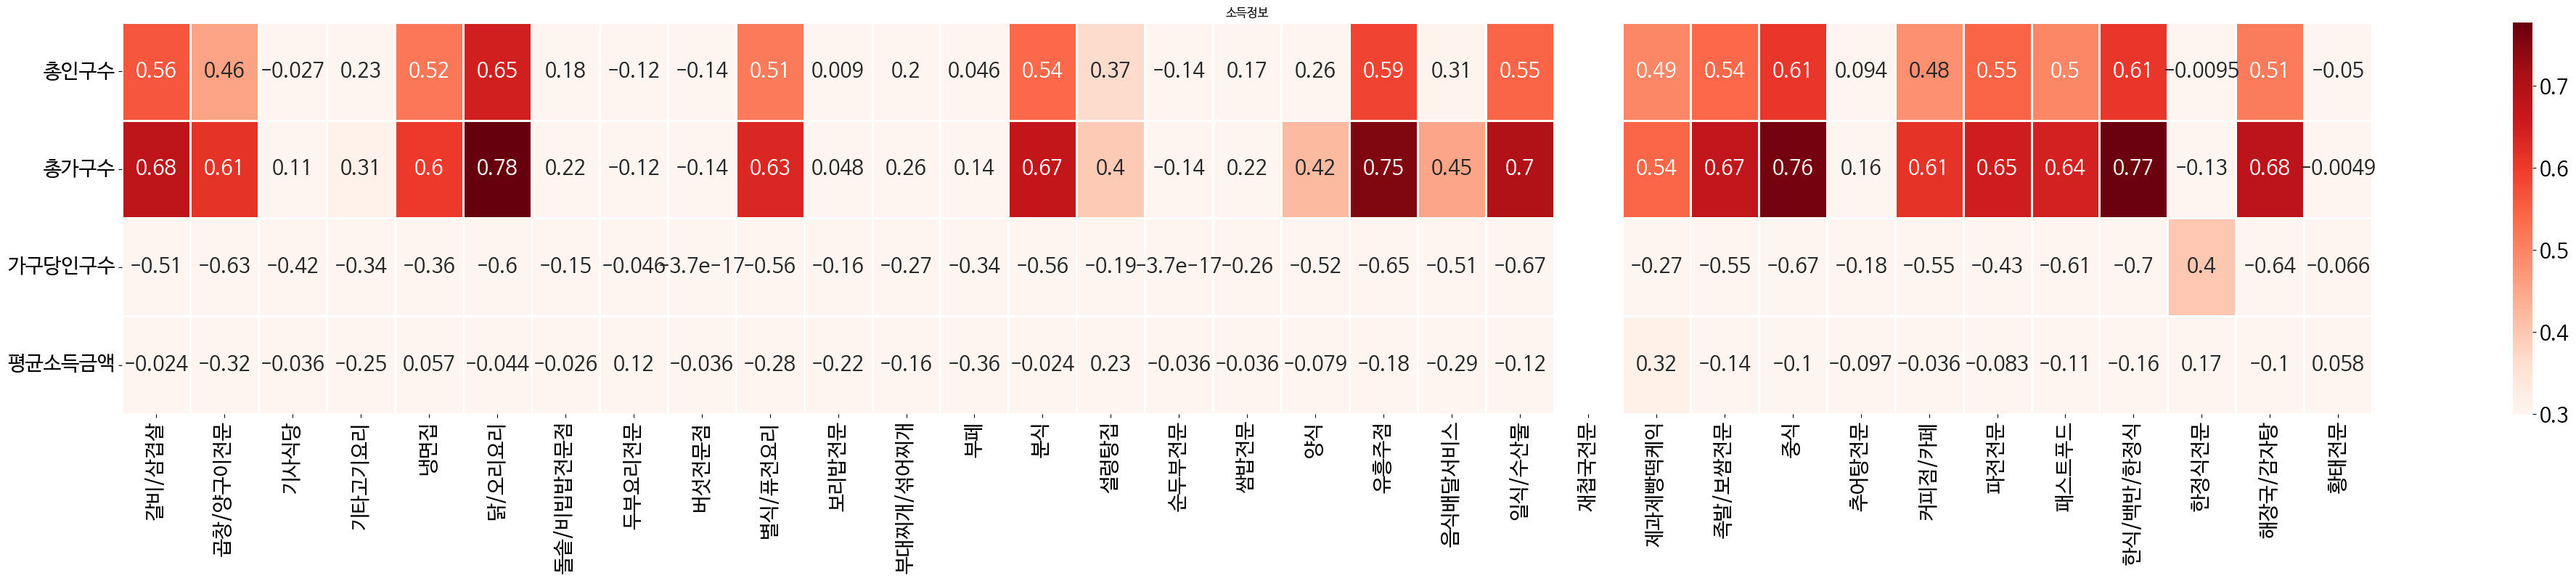

In [23]:
### 시각화
# annot: 각 cell의 값 표시 여부
# linewidths: cell 사이의 선 간격

# 상관계수의 절댓값이 0.3 이상인 변수들만 색으로 표시
plt.figure(figsize = (50,7))
sns.heatmap(income_corr,annot = True, vmin = 0.3, linewidths = 1, annot_kws={"size": 20}, cmap = 'Reds')
plt.title("소득정보")
plt.show()

In [24]:
result_income.groupby('업종')['변수'].count()

업종
갈비/삼겹살       3
곱창/양구이전문     4
기사식당         1
기타고기요리       2
냉면집          3
닭/오리요리       3
별식/퓨전요리      3
부페           2
분식           3
설렁탕집         2
양식           2
유흥주점         3
음식배달서비스      3
일식/수산물       3
제과제빵떡케익      3
족발/보쌈전문      3
중식           3
커피점/카페       3
파전전문         3
패스트푸드        3
한식/백반/한정식    3
한정식전문        1
해장국/감자탕      3
Name: 변수, dtype: int64

- 소득정보 데이터의 전체 변수 개수: **4개**
- 소득정보 데이터의 경우 변수들의 상당수가 각 업종들과의 상관계수가 0.3 이상임을 확인할 수 있다.
- 소득정보 데이터의 경우 상당수의 변수들이 각 업종의 업소 수와 뚜렷한 상관관계가 있다고 할 수 있다.
- 서울시 전체와 비교하였을 때 **강동구**에서 소득정보 데이터가 각 업종별 업소 수와 상관관계가 더 크다고 할 수 있다.

### **e) 상권변화지표**

In [25]:
### 필요한 데이터 추출

df_change = pd.concat([df.iloc[:,0:35],df.iloc[:,60:63]],axis = 1)
df_change.head()

,행정구,행정동,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,...,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문,상권변화지표,운영점포영업개월,폐업점포영업개월
0,강동구,강일동,3,2,0,1,0,11,0,0,...,11,0,9,21,0,0,0,LL,74.0,45.0
1,강동구,상일1동,11,2,0,0,2,11,0,0,...,39,0,12,46,1,1,0,LH,107.0,59.0
2,강동구,상일2동,1,0,0,0,0,0,0,0,...,11,0,4,7,0,0,0,LH,107.0,59.0
3,강동구,명일1동,14,5,0,3,5,18,1,1,...,59,0,18,46,1,5,0,LL,119.0,51.0
4,강동구,명일2동,6,0,0,0,1,7,0,0,...,34,0,18,26,0,2,0,LH,117.0,57.0


In [26]:
### 상관계수 파악
# 상권변화지표의 경우 문자형(object형) -> 상관계수를 계산할 수 없음

change_corr = df_change.corr().iloc[33:,:33]
change_corr

,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,별식/퓨전요리,...,족발/보쌈전문,중식,추어탕전문,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문
운영점포영업개월,0.067944,0.079444,0.054329,0.100605,0.078562,-0.099422,0.105260,0.136560,0.066332,0.002462,...,-0.014645,0.057687,0.123849,0.076580,0.096869,-0.062180,0.043362,-0.091298,0.086598,-0.117644
폐업점포영업개월,-0.390026,-0.361136,-0.209022,-0.322987,-0.200348,-0.549429,-0.091252,-0.230399,-0.041804,-0.368011,...,-0.398627,-0.376797,-0.138469,-0.473265,-0.244425,-0.582496,-0.472830,0.127999,-0.286530,0.068692


In [27]:
### 각 업종별로 상관계수가 높은 변수 확인하기
# 업종은 오름차순, 상관계수는 내림차순

result_change = selection(change_corr)
result_change.sort_values(by = ['업종','상관계수'],ascending = [True, False]).reset_index(drop = True)

,업종,변수,상관계수
0,갈비/삼겹살,폐업점포영업개월,-0.390026
1,곱창/양구이전문,폐업점포영업개월,-0.361136
2,기타고기요리,폐업점포영업개월,-0.322987
3,닭/오리요리,폐업점포영업개월,-0.549429
4,별식/퓨전요리,폐업점포영업개월,-0.368011
5,부페,폐업점포영업개월,-0.411077
6,분식,폐업점포영업개월,-0.589886
7,양식,폐업점포영업개월,-0.403643
8,유흥주점,폐업점포영업개월,-0.396123
9,일식/수산물,폐업점포영업개월,-0.522919


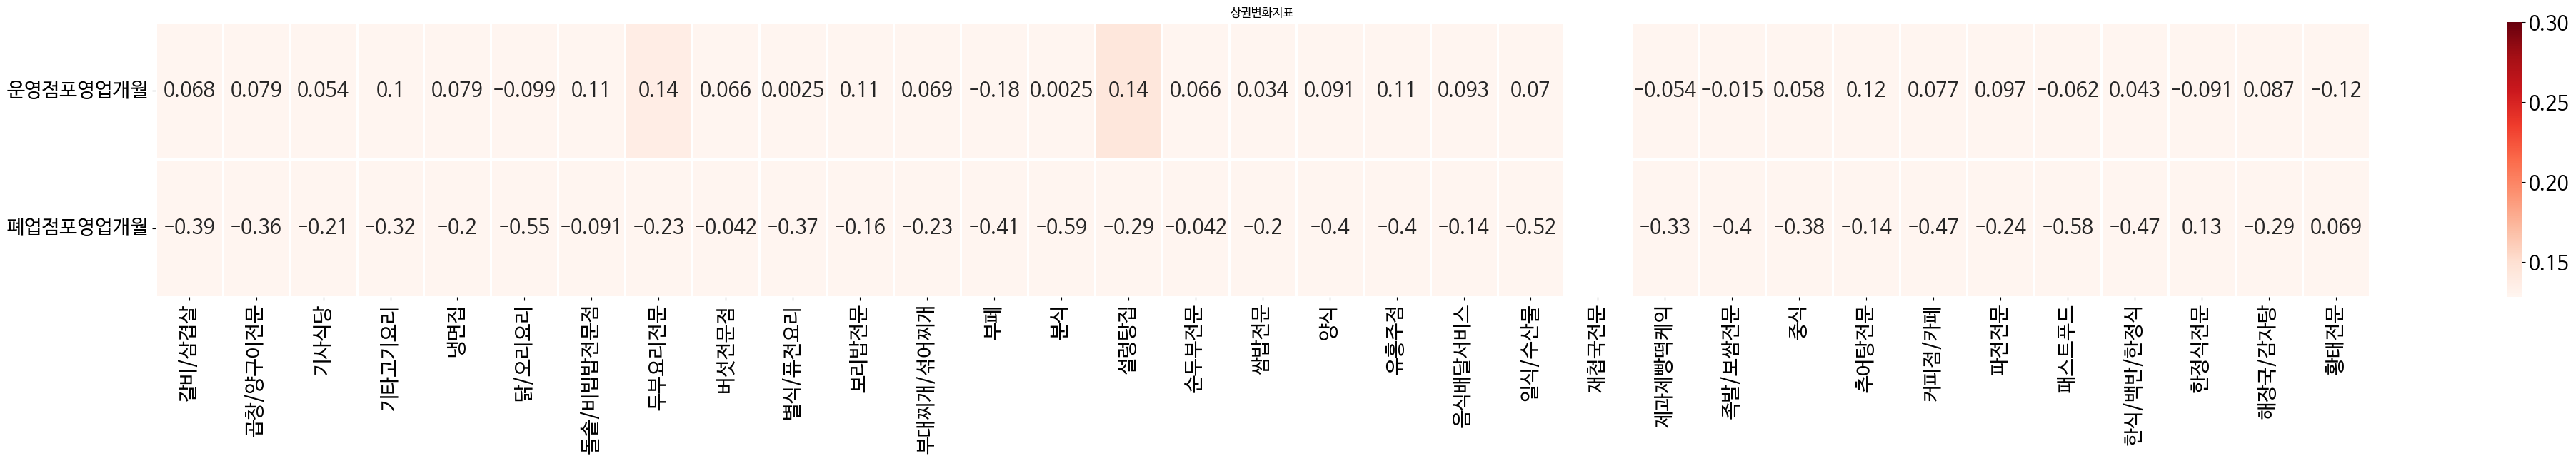

In [28]:
### 시각화
# annot: 각 cell의 값 표시 여부
# linewidths: cell 사이의 선 간격

# 상관계수의 절댓값이 0.3 이상인 변수들만 색으로 표시
plt.figure(figsize = (50,5))
sns.heatmap(change_corr,annot = True, vmin = 0.3, linewidths = 1, annot_kws={"size": 20}, cmap = 'Reds')
plt.title("상권변화지표")
plt.show()

In [29]:
result_change.groupby('업종')['변수'].count()

업종
갈비/삼겹살       1
곱창/양구이전문     1
기타고기요리       1
닭/오리요리       1
별식/퓨전요리      1
부페           1
분식           1
양식           1
유흥주점         1
일식/수산물       1
제과제빵떡케익      1
족발/보쌈전문      1
중식           1
커피점/카페       1
패스트푸드        1
한식/백반/한정식    1
Name: 변수, dtype: int64

- 상권변화지표 데이터의 전체 변수 개수: **3개**  
(단, 상권변화지표의 경우 문자형(object형) -> 상관계수를 계산할 수 없음)  
- 상권변화지표 데이터의 경우 변수들의 상당수가 각 업종들과의 상관계수가 0.3 이상이다.  
- 서울시 전체와 다르게 **강동구**에서는 상권변화지표 데이터는 각 업종의 업소 수와 뚜렷한 상관관계가 있다고 할 수 있다.

### **f) 주민등록인구**

In [30]:
### 필요한 데이터 추출

df_population = pd.concat([df.iloc[:,0:35],df.iloc[:,63:70]],axis = 1)
df_population.head()

,행정구,행정동,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,...,한정식전문,해장국/감자탕,황태전문,10대 미만,10대,20 ~ 30대,40 ~ 50대,60대,70대 이상,총인구
0,강동구,강일동,3,2,0,1,0,11,0,0,...,0,0,0,2989,3571,8025,10231,4807,3474,33097
1,강동구,상일1동,11,2,0,0,2,11,0,0,...,1,1,0,4847,4315,9226,13121,4984,2545,39038
2,강동구,상일2동,1,0,0,0,0,0,0,0,...,0,0,0,1080,1414,3329,3565,1349,1234,11971
3,강동구,명일1동,14,5,0,3,5,18,1,1,...,1,5,0,2144,2410,6787,8154,3741,2461,25697
4,강동구,명일2동,6,0,0,0,1,7,0,0,...,0,2,0,1026,2430,4110,5711,2550,1535,17362


In [31]:
### 상관계수 파악

population_corr = df_population.corr().iloc[33:,:33]
population_corr

,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,별식/퓨전요리,...,족발/보쌈전문,중식,추어탕전문,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문
10대 미만,0.150850,0.026388,-0.187166,-0.052826,0.213558,0.167217,0.050699,-0.078249,-0.071795,0.156862,...,0.014723,0.086381,-0.160961,0.068323,0.012441,0.029821,0.067924,0.499705,-0.003074,-0.006134
10대,0.162919,-0.075546,-0.231207,-0.099593,0.177513,0.218625,0.002167,-0.063676,-0.091872,0.067280,...,0.073871,0.038435,-0.035038,0.076158,0.051558,0.106336,0.062179,0.358472,-0.038867,-0.103917
20 ~ 30대,0.754899,0.667487,0.084305,0.381841,0.657805,0.833813,0.238156,-0.044694,-0.079601,0.719241,...,0.701001,0.824948,0.197565,0.705377,0.658278,0.731337,0.844828,-0.024357,0.737953,0.026947
40 ~ 50대,0.610416,0.430262,-0.049342,0.216880,0.528117,0.726751,0.160032,-0.059965,-0.107483,0.573157,...,0.559417,0.615702,0.134201,0.541070,0.482299,0.566386,0.635992,0.175635,0.504204,0.003541
60대,0.677196,0.557957,0.028891,0.308299,0.586895,0.795365,0.186042,-0.072479,-0.124659,0.689052,...,0.652997,0.735137,0.172194,0.611338,0.629669,0.687597,0.750422,0.040266,0.617955,-0.028932
70대 이상,0.683224,0.606803,0.079812,0.352061,0.554593,0.841480,0.204130,-0.059328,-0.102713,0.687045,...,0.727317,0.760127,0.233024,0.634259,0.649066,0.706203,0.788356,-0.102240,0.671012,-0.015577
총인구,0.644935,0.496640,-0.017577,0.261264,0.567289,0.750485,0.182778,-0.065358,-0.106736,0.615390,...,0.590851,0.667453,0.138457,0.574605,0.537986,0.610300,0.686278,0.128389,0.559621,-0.007975


In [32]:
### 각 업종별로 상관계수가 높은 변수 확인하기
# 업종은 오름차순, 상관계수는 내림차순

result_population = selection(population_corr)
result_population.sort_values(by = ['업종','상관계수'],ascending = [True, False]).reset_index(drop = True)

,업종,변수,상관계수
0,갈비/삼겹살,20 ~ 30대,0.754899
1,갈비/삼겹살,70대 이상,0.683224
2,갈비/삼겹살,60대,0.677196
3,갈비/삼겹살,총인구,0.644935
4,갈비/삼겹살,40 ~ 50대,0.610416
...,...,...,...
97,해장국/감자탕,20 ~ 30대,0.737953
98,해장국/감자탕,70대 이상,0.671012
99,해장국/감자탕,60대,0.617955
100,해장국/감자탕,총인구,0.559621


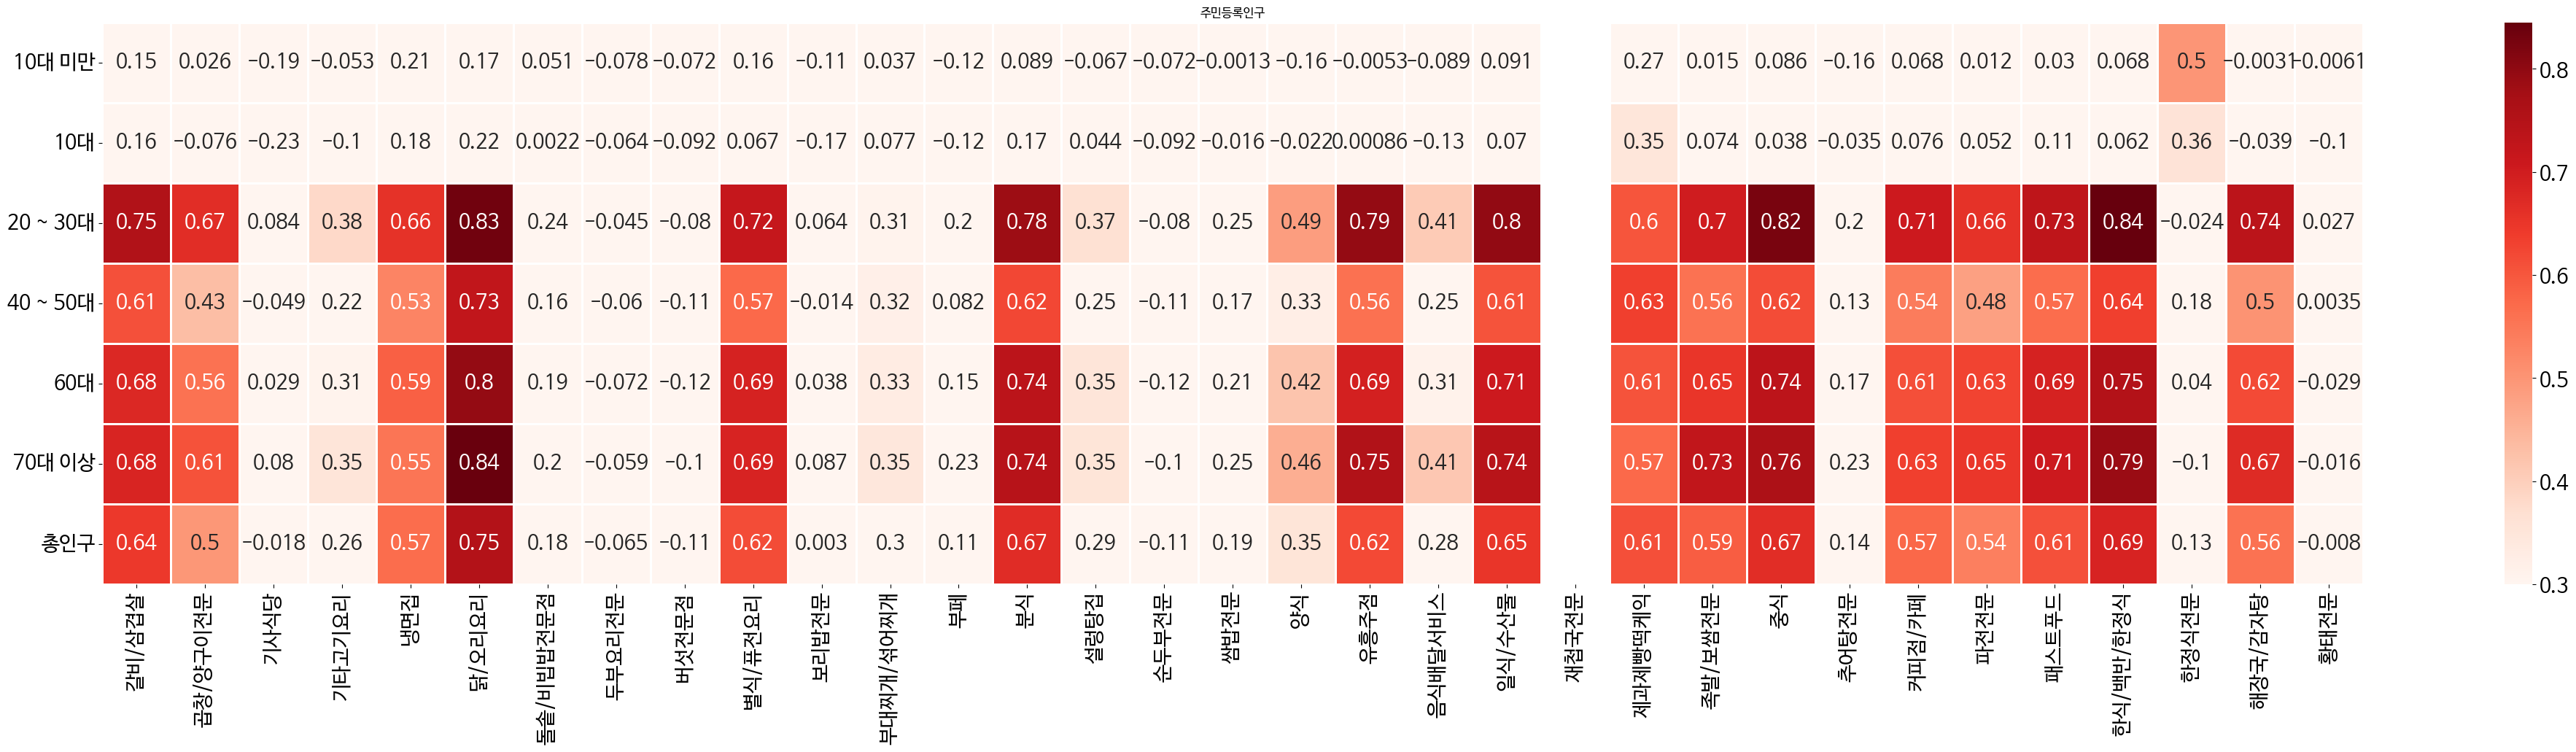

In [33]:
### 시각화
# annot: 각 cell의 값 표시 여부
# linewidths: cell 사이의 선 간격

# 상관계수의 절댓값이 0.3 이상인 변수들만 색으로 표시
plt.figure(figsize = (50,10))
sns.heatmap(population_corr,annot = True, vmin = 0.3, linewidths = 1, annot_kws={"size": 20}, cmap = 'Reds')
plt.title("주민등록인구")
plt.show()

In [34]:
result_population.groupby('업종')['변수'].count()

업종
갈비/삼겹살       5
곱창/양구이전문     5
기타고기요리       3
냉면집          5
닭/오리요리       5
별식/퓨전요리      5
부대찌개/섞어찌개    5
분식           5
설렁탕집         3
양식           5
유흥주점         5
음식배달서비스      3
일식/수산물       5
제과제빵떡케익      6
족발/보쌈전문      5
중식           5
커피점/카페       5
파전전문         5
패스트푸드        5
한식/백반/한정식    5
한정식전문        2
해장국/감자탕      5
Name: 변수, dtype: int64

- 주민등록인구 데이터의 전체 변수 개수: **7개**
- 주민등록인구 데이터의 경우 대부분의 변수들이 각 업종들과의 상관계수가 0.3 이상임을 확인할 수 있다.
- 주민등록인구 데이터의 경우 대부분의 변수들이 각 업종의 업소 수와 뚜렷한 상관관계가 있다고 할 수 있다.
- 서울시 전체와 비교하였을 때 **강동구**에서의 주민등록인구 데이터가 각 업종별 업소 수와 상관관계가 더 크다고 할 수 있다.

### **g) 지하철**

In [35]:
### 필요한 데이터 추출

df_subway = pd.concat([df.iloc[:,0:35],df.iloc[:,70:]],axis = 1)
df_subway.head()

,행정구,행정동,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,...,추어탕전문,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문,역(전체),역(환승역)
0,강동구,강일동,3,2,0,1,0,11,0,0,...,0,11,0,9,21,0,0,0,1,0
1,강동구,상일1동,11,2,0,0,2,11,0,0,...,0,39,0,12,46,1,1,0,1,0
2,강동구,상일2동,1,0,0,0,0,0,0,0,...,0,11,0,4,7,0,0,0,0,0
3,강동구,명일1동,14,5,0,3,5,18,1,1,...,0,59,0,18,46,1,5,0,2,0
4,강동구,명일2동,6,0,0,0,1,7,0,0,...,2,34,0,18,26,0,2,0,0,0


In [36]:
### 상관계수 파악

subway_corr = df_subway.corr().iloc[33:,:33]
subway_corr

,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,별식/퓨전요리,...,족발/보쌈전문,중식,추어탕전문,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문
역(전체),0.429260,0.492155,-0.223607,0.458348,0.638861,0.189445,0.705024,0.239629,0.130437,0.184072,...,0.146711,0.263403,0.057864,0.297611,0.203842,0.103738,0.210980,0.239629,0.408697,-0.102062
역(환승역),0.481527,0.751363,-0.055556,0.613186,0.580289,0.346561,0.687184,-0.102062,-0.055556,0.418132,...,0.544331,0.303728,0.287527,0.394589,0.282913,0.258034,0.393097,-0.102062,0.609249,0.456435


In [37]:
### 각 업종별로 상관계수가 높은 변수 확인하기
# 업종은 오름차순, 상관계수는 내림차순

result_subway = selection(subway_corr)
result_subway.sort_values(by = ['업종','상관계수'],ascending = [True, False]).reset_index(drop = True)

,업종,변수,상관계수
0,갈비/삼겹살,역(환승역),0.481527
1,갈비/삼겹살,역(전체),0.429260
2,곱창/양구이전문,역(환승역),0.751363
3,곱창/양구이전문,역(전체),0.492155
4,기타고기요리,역(환승역),0.613186
5,기타고기요리,역(전체),0.458348
6,냉면집,역(전체),0.638861
7,냉면집,역(환승역),0.580289
8,닭/오리요리,역(환승역),0.346561
9,돌솥/비빕밥전문점,역(전체),0.705024


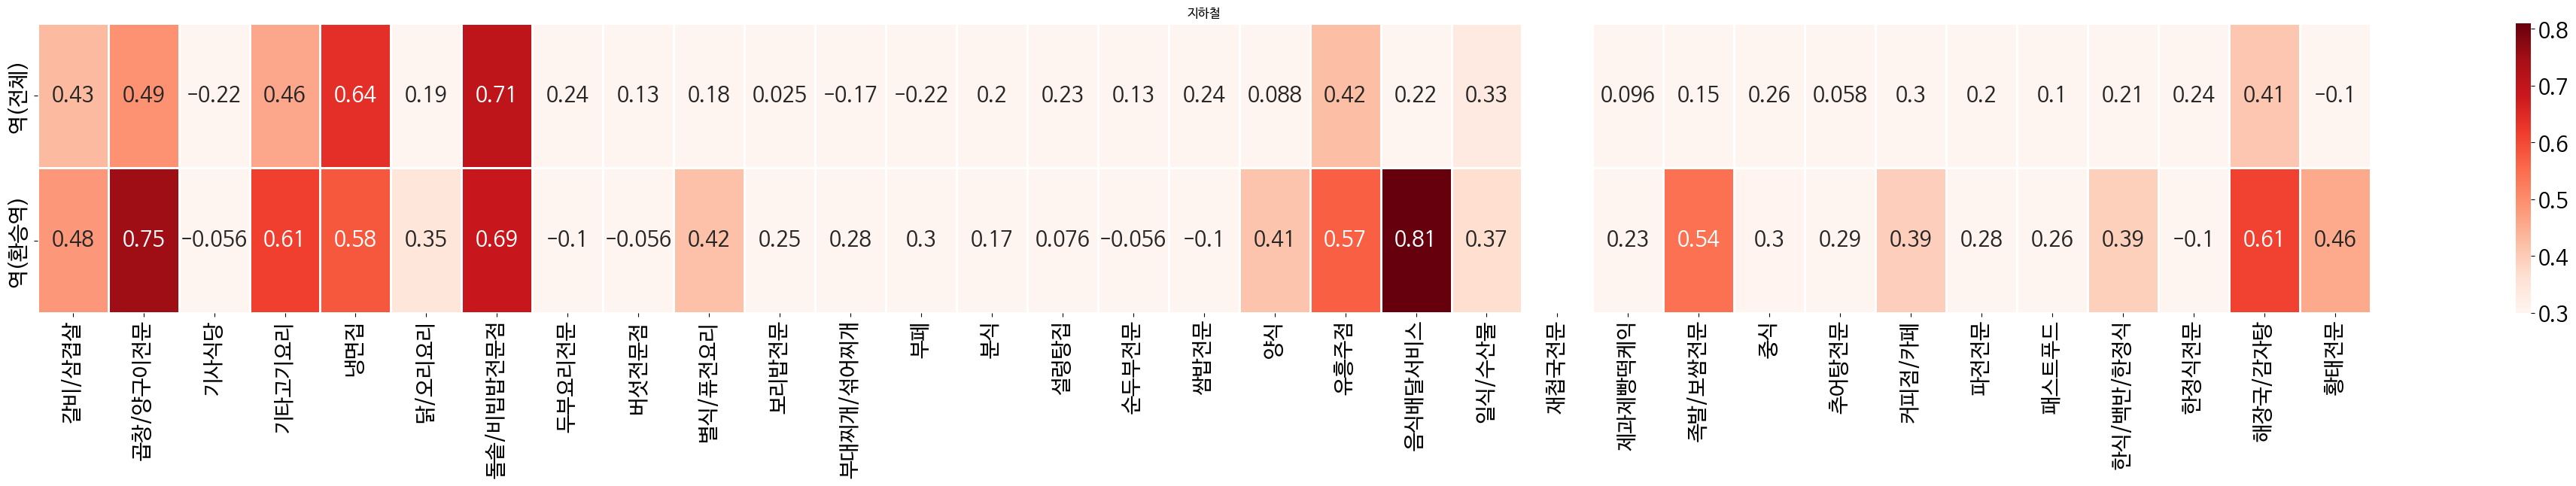

In [38]:
### 시각화
# annot: 각 cell의 값 표시 여부
# linewidths: cell 사이의 선 간격

# 상관계수의 절댓값이 0.3 이상인 변수들만 색으로 표시
plt.figure(figsize = (50,5))
sns.heatmap(subway_corr,annot = True, vmin = 0.3, linewidths = 1, annot_kws={"size": 20}, cmap = 'Reds')
plt.title("지하철")
plt.show()

In [39]:
result_subway.groupby('업종')['변수'].count()

업종
갈비/삼겹살       2
곱창/양구이전문     2
기타고기요리       2
냉면집          2
닭/오리요리       1
돌솥/비빕밥전문점    2
별식/퓨전요리      1
양식           1
유흥주점         2
음식배달서비스      1
일식/수산물       2
족발/보쌈전문      1
중식           1
커피점/카페       1
한식/백반/한정식    1
해장국/감자탕      2
황태전문         1
Name: 변수, dtype: int64

- 지하철 데이터의 전체 변수 개수: **2개**
- 지하철 데이터의 경우 거의 모든 변수들이 각 업종들과의 상관계수가 0.3 이상임을 확인할 수 있다.
- 지하철 데이터의 경우 거의 모든 변수들이 각 업종의 업소 수와 뚜렷한 상관관계가 있다고 할 수 있다.
- 서울시 전체와 비교하였을 때 **강동구**에서의 지하철 데이터가 각 업종별 업소 수와 상관관계가 더 크다고 할 수 있다.